# Heat equation smoothing (using conv)

### Name : Eun-Yeong Jeon
### github : https://github.com/Eun0

# Import packages for manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

# Load image :

In [2]:
file_image='프로필.jpg'

im_color=io.imread('C:/Users/Eun0/Pictures/'+file_image)
im_gray=color.rgb2gray(im_color)

type(im_gray)

numpy.ndarray

# Show color and gray image :

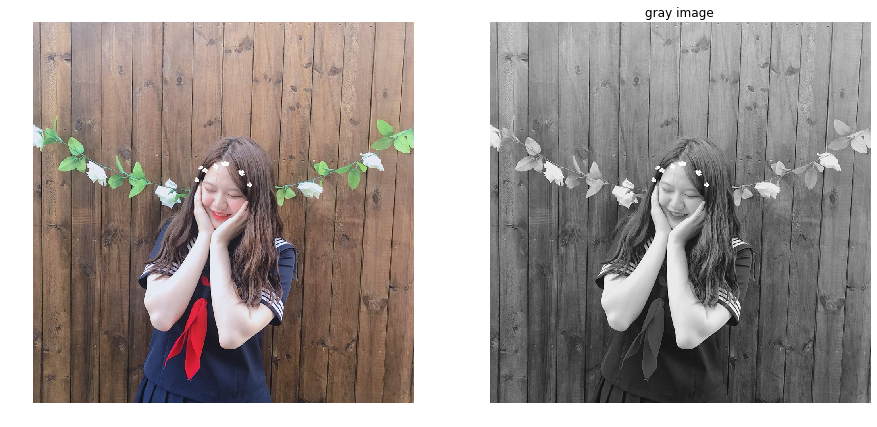

In [3]:
plt.figure(figsize=(15,15))

p1=plt.subplot(1,2,1)
p1.set_title=('color image')
plt.imshow(im_color)
plt.axis('off')

p2=plt.subplot(1,2,2)
p2.set_title('gray image')
plt.imshow(im_gray,cmap='gray')
plt.axis('off')
plt.show()

# Define Heat Equation

$U_t-\alpha \, \triangle u = 0$

$\Leftrightarrow \frac{u^{n+1}-u^n}{\Delta t}= \alpha[u^n_{xx}+u^n_{yy}]$


$\Leftrightarrow u^{n+1}= u^n + \Delta t\, \alpha[u^n_{xx}+u^n_{yy}]$



- $u_xx \approx u(x+1,y)-2u(x,y)+u(x-1,y)$
- $u_yy \approx u(x,y+1)-2u(x,y)+u(x,y-1)$

Therefore, $\triangle u \approx u(x+1,y)+u(x-1,y)+u(x,y+1)+u(x,y-1)-4u(x,y)$

<br> 

In this script we set,


- delta time=1/4
- alpha=1/4

# Set hyperparameter :

In [4]:
DELTA_T=1/4
ALPHA=1/4

# Pad image with Neumann Boundary Conditions :

In [5]:
im_padded=np.zeros((im_gray.shape[0]+2,im_gray.shape[1]+2))

im_padded[1:-1,1:-1]=im_gray

# Up
im_padded[0,1:-1]=im_padded[0,1:-1]

# Down
im_padded[-1,1:-1]=im_padded[-2,1:-1]

# Left
im_padded[1:-1,0]=im_padded[1:-1,1]

# Right
im_padded[1:-1,-1]=im_padded[1:-1,-2]

# Set filter for computing $\triangle u$ :

we need to compute

$ \triangle u \approx u(x+1,y)+u(x-1,y)+u(x,y+1)+u(x,y-1)-4u(x,y) $

Therefore, the filter is

$\begin{bmatrix}
0 & 1 &0 \\ 
1& -4 &1 \\ 
0 & 1 & 0
\end{bmatrix}$


In [6]:
f_laple_u=np.array([[0,1,0],[1,-4,1],[0,1,0]])

f_laple_u

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

# Compute convolution with $\triangle u$ filter :

In [7]:
im_conv=signal.convolve2d(im_padded,f_laple_u,mode='valid')

In [8]:
len(im_conv)

960

In [9]:
im_heat=im_padded[1:-1,1:-1]+DELTA_T*ALPHA*im_conv

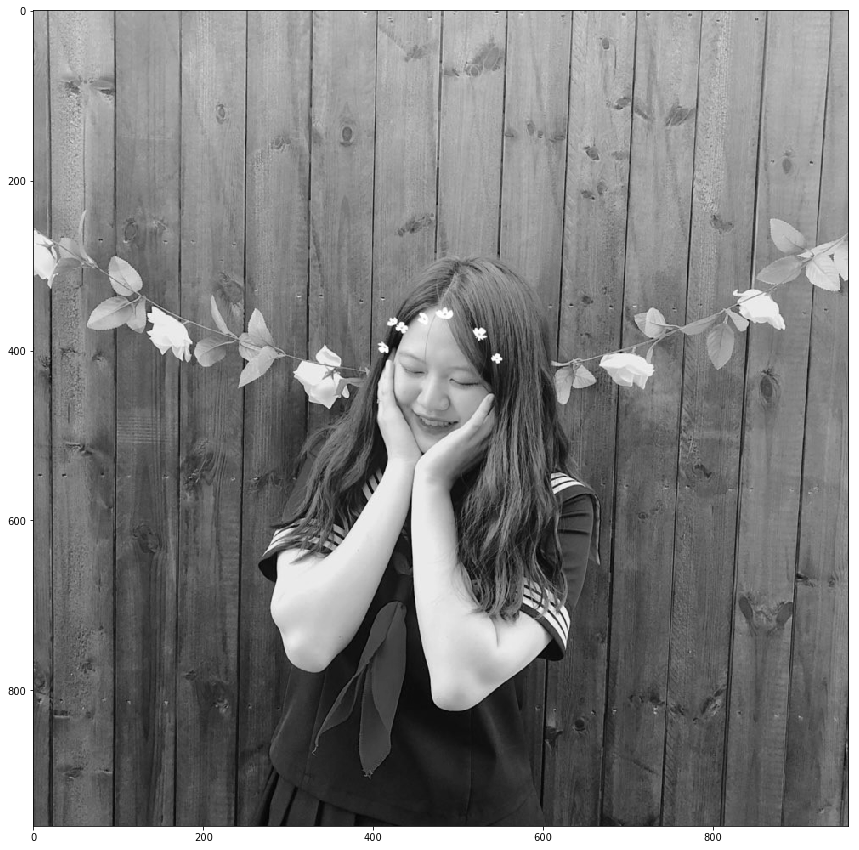

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(im_heat,cmap='gray')

# Define compute_heat( img, delt_t, alpha ) :

Compute heat equation from image.


(1) Pad img with Neumann BC

(2) Compute heat equation from img using convolution


In [11]:
def compute_heat(img,delta_t,alpha):
    
    ## Padding 
    im_padded=np.zeros((img.shape[0]+2,img.shape[1]+2))

    im_padded[1:-1,1:-1]=img

    # Up
    im_padded[0,1:-1]=im_padded[0,1:-1]

    # Down
    im_padded[-1,1:-1]=im_padded[-2,1:-1]

    # Left
    im_padded[1:-1,0]=im_padded[1:-1,1]

    # Right
    im_padded[1:-1,-1]=im_padded[1:-1,-2]

    ## Set filter for convolution
    f_laple_u=np.array([[0,1,0],[1,-4,1],[0,1,0]])
    
    ## Compute convolution
    im_conv=signal.convolve2d(im_padded,f_laple_u,mode='valid')
    
    ## Compute heat equation
    im_heat=im_padded[1:-1,1:-1]+delta_t*alpha*im_conv
    
    return im_heat

# Plot results at iteration 0,8,32,128 :

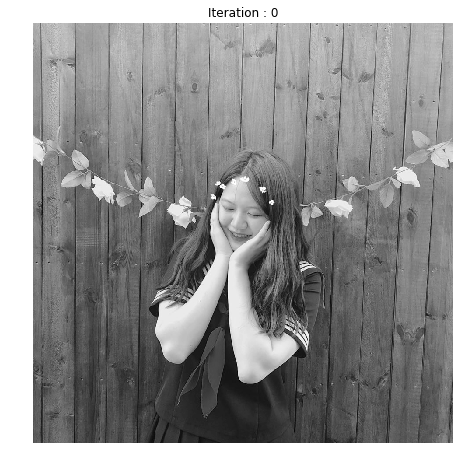

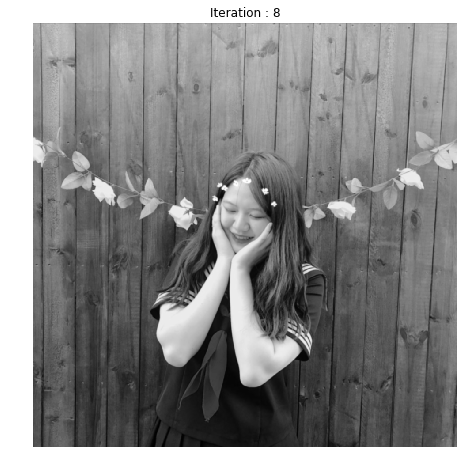

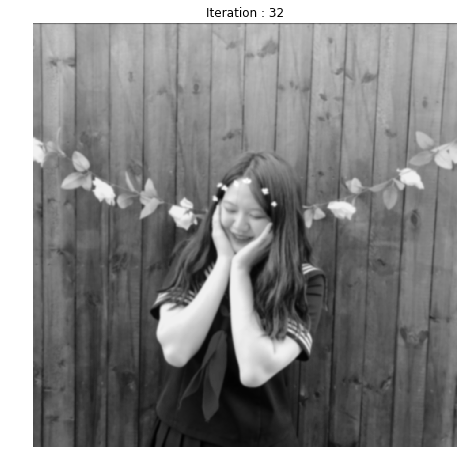

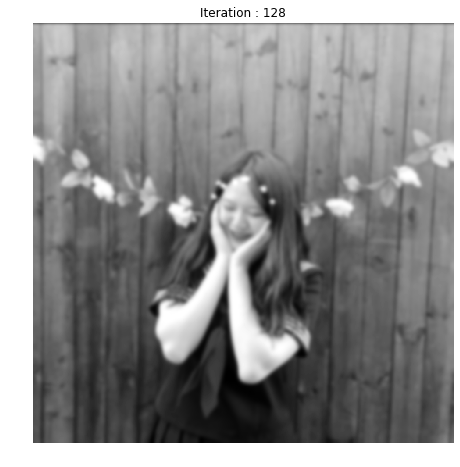

In [12]:
plot_list=[0,8,32,128]

img=im_gray



for i in range(129):
    
    if i in plot_list:
        plt.figure(figsize=(25,25))
        plt.subplot(4,1,plot_list.index(i)+1)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title('Iteration : '+str(i))
        plt.tight_layout()
        plt.show()
    
    img=compute_heat(img,DELTA_T,ALPHA)

